Exercício: Implementação de equalização de histograma e segmentação por limiar
=====
----------------------

## Questões
----------------------------

#### 1. Implemente sua própria função de cálculo de histograma apresentando o código em Python.

**Resolução**

Importação das bibliotecas:

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

A biblioteca do **OpenCV** será usada para o carregamento da imagem, **Numpy** para manipulação da imagem como matriz e **MatPlotLib** para plotagem de gráficos.

Agora, o objetivo é a implementação de um função própria de cálculo de histograma.

Inicialmente, carregou-se uma imagem em escala de cinza para que fosse trabalhado apenas com duas dimensões, ou seja, único canal.

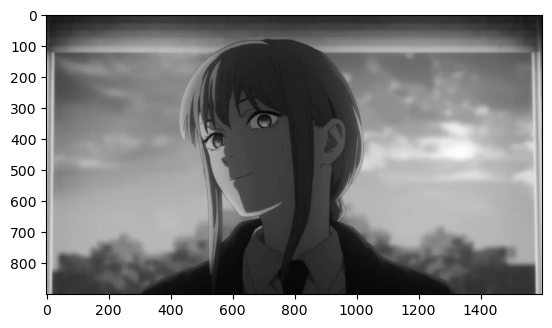

In [2]:
img = cv.imread("wiki.jpg",0)
plt.imshow(img, 'gray'); plt.show()

Posteriormente, criou-se função `histogram()` que recebe como parâmetro a matriz da imagem. Nela, é feito a contagem de pixels da imagem com os valores entre 0 e 255, e assim, retornando uma lista com os valores salvos.

In [3]:
def histogram(image):
    hist = []

    img_array = image.flatten() # transforma a matriz 2d em 1d

    for i in range(256):
        hist.append(img_array.tolist().count(i)) # converte a matriz em lista, faz a contagem e salva na lista

    return hist

Finalmente, a aplicação da função `histogram()` e fazendo uma comparação com a função `plt.hist()` da biblioteca do MatPlotLib.

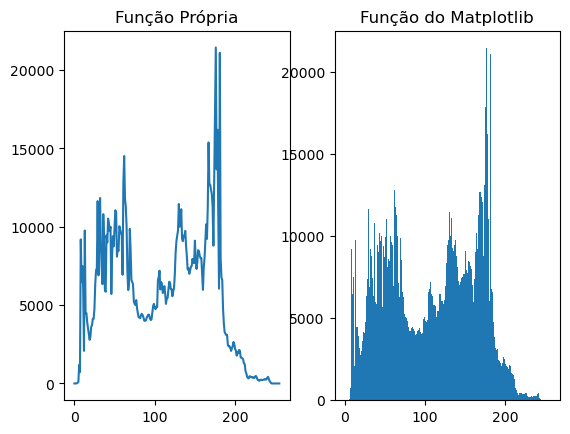

In [4]:
hist_array = histogram(img)

plt.subplot(121)
plt.plot(hist_array)
plt.title("Função Própria")
plt.subplot(122)
plt.title("Função do Matplotlib")
plt.hist(img.ravel(),256,[0,256])
plt.show()

#### 2. Aplique a equalização em diferentes imagens e no exemplo apresentado no livro do Gonzalez para demonstrar o funcionamento da função.

#### Faça os gráficos dos histogramas de entradas e saída, bem como a função T(r).

**Resolução**

A equalização das imagem foi aplicado através da função `cv.equalizeHist()` do OpenCV.

<function matplotlib.pyplot.show(close=None, block=None)>

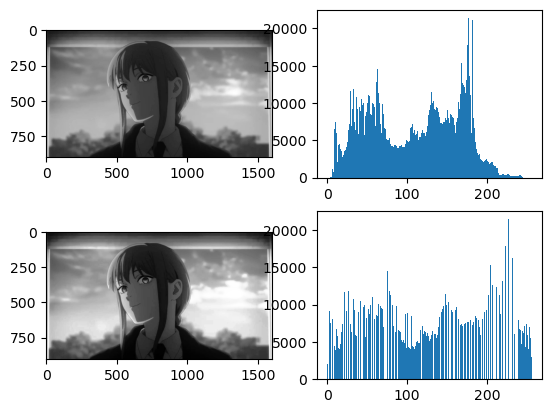

In [13]:
equ = cv.equalizeHist(img)

plt.subplot(221)
plt.imshow(img, 'gray')
plt.subplot(222)
plt.hist(img.ravel(),256,[0,256])
plt.subplot(223)
plt.imshow(equ, 'gray')
plt.subplot(224)
plt.hist(equ.ravel(),256,[0,256])
plt.show


#### 3. Implemente a sua função de segmentação por limiar, calculando o limiar ótimo conforme apresentado no livro do Gonzalez.

**Resolução**

Para a segmentação por limiar, tomou-se como base os valores da matriz da imagem que variam entre 0 e 255. Nisso, dividiu o valor de 256 em 2, na qual os valores que estão entre 0 à 127 serão 0 (ou seja, cor branca) e entre 128 à 255 serão 1 (ou seja, cor preta). Assim, obteve-se a função `myThreshold()`.

In [6]:
def myThreshold(image):

    threshold = np.copy(image)

    for column in range(image.shape[1]):
        for line in range(image.shape[0]):
            if image[line][column] < 256/2:
                threshold[line][column] = 0
            else:
                threshold[line][column] = 1

    return threshold

Resultados comparando com a função do OpenCV `threshold()`.

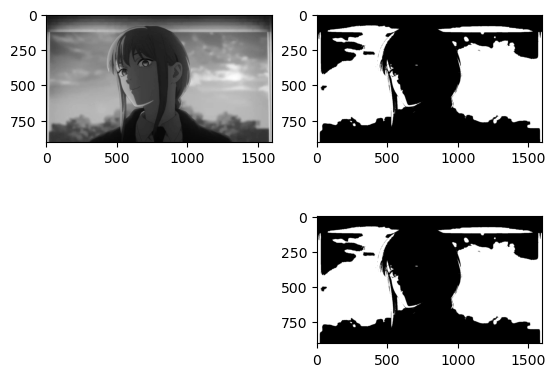

In [7]:
threshold = myThreshold(img)
ret, threshold_cv2 = cv.threshold(img,127,255,cv.THRESH_BINARY)

plt.subplot(221)
plt.imshow(img,'gray')
plt.subplot(222)
plt.imshow(threshold,'gray')
plt.subplot(224)
plt.imshow(threshold_cv2,'gray')
plt.show()

#### 4. Faça uma versão que considere a aplicação da segmentação adaptativa.

**Resolução**

Foi utilizado a função `cv.adaptiveThreshold()` do OpenCV com o parâmetro `cv.ADAPTIVE_THRESH_GAUSSIAN_C` que aplica filtro Kernel Gaussiano no Threshold.

In [8]:
adThreshould = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)

Resultado:

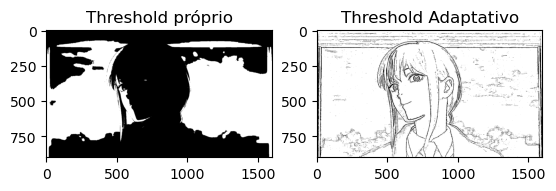

In [9]:
plt.subplot(121)
plt.imshow(threshold,'gray')
plt.title("Threshold próprio")
plt.subplot(122)
plt.title("Threshold Adaptativo")
plt.imshow(adThreshould,'gray')
plt.show()